Question2: predict the probability of Heart Disease

Write and submit your python codes in “Jupyter Notebook” to perform the following tasks. Make
sure to provide proper descriptions as MarkDown for each section of your code.


a- In this question, we work with a simplified version of Heart dataset (remember that this
dataset is a little different from what you have used in HW3). Read the dataset file
“Hearts_short.csv” (you should download it from CSNS), and assign it to a Pandas
DataFrame.


In [6]:
# Importing libraries and packages:

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

heart_sh_df = pd.read_csv('C:/RiddhiDocuments/Python/Assignment/HW4/Heart_short.csv')


print(heart_sh_df)

     Age  RestBP  Chol  RestECG  MaxHR  Oldpeak  AHD
0     63     145   233        2    150      2.3   No
1     67     160   286        2    108      1.5  Yes
2     67     120   229        2    129      2.6  Yes
3     37     130   250        0    187      3.5   No
4     41     130   204        2    172      1.4   No
5     56     120   236        0    178      0.8   No
6     62     140   268        2    160      3.6  Yes
7     57     120   354        0    163      0.6   No
8     63     130   254        2    147      1.4  Yes
9     53     140   203        2    155      3.1  Yes
10    57     140   192        0    148      0.4   No
11    56     140   294        2    153      1.3   No
12    56     130   256        2    142      0.6  Yes
13    44     120   263        0    173      0.0   No
14    52     172   199        0    162      0.5   No
15    57     150   168        0    174      1.6   No
16    48     110   229        0    168      1.0  Yes
17    54     140   239        0    160      1.

In [7]:
heart_sh_df

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
1,67,160,286,2,108,1.5,Yes
2,67,120,229,2,129,2.6,Yes
3,37,130,250,0,187,3.5,No
4,41,130,204,2,172,1.4,No
5,56,120,236,0,178,0.8,No
6,62,140,268,2,160,3.6,Yes
7,57,120,354,0,163,0.6,No
8,63,130,254,2,147,1.4,Yes
9,53,140,203,2,155,3.1,Yes


b- Generate the feature matrix and label vector (AHD). Then, normalize (scale) the features.

In [8]:
feat_cols = ['Age','RestBP','Chol','RestECG','MaxHR','Oldpeak']

X = heart_sh_df[feat_cols]

y = heart_sh_df['AHD']

print(X.head()) # print the first 5 rows
print(y.head()) # print the first 5 rows

#print(X)
#print(y)

   Age  RestBP  Chol  RestECG  MaxHR  Oldpeak
0   63     145   233        2    150      2.3
1   67     160   286        2    108      1.5
2   67     120   229        2    129      2.6
3   37     130   250        0    187      3.5
4   41     130   204        2    172      1.4
0     No
1    Yes
2    Yes
3     No
4     No
Name: AHD, dtype: object


In [9]:
ahd = {'No': 0,'Yes': 1}
heart_sh_df.AHD = [ahd[item] for item in heart_sh_df.AHD]
print(heart_sh_df)

     Age  RestBP  Chol  RestECG  MaxHR  Oldpeak  AHD
0     63     145   233        2    150      2.3    0
1     67     160   286        2    108      1.5    1
2     67     120   229        2    129      2.6    1
3     37     130   250        0    187      3.5    0
4     41     130   204        2    172      1.4    0
5     56     120   236        0    178      0.8    0
6     62     140   268        2    160      3.6    1
7     57     120   354        0    163      0.6    0
8     63     130   254        2    147      1.4    1
9     53     140   203        2    155      3.1    1
10    57     140   192        0    148      0.4    0
11    56     140   294        2    153      1.3    0
12    56     130   256        2    142      0.6    1
13    44     120   263        0    173      0.0    0
14    52     172   199        0    162      0.5    0
15    57     150   168        0    174      1.6    0
16    48     110   229        0    168      1.0    1
17    54     140   239        0    160      1.

In [10]:
x_scale = preprocessing.scale(X)
x_scale

C:\Users\Riddhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


array([[ 0.94788279,  0.74978425, -0.25859799,  1.04743633, -0.00919313,
         1.13182982],
       [ 1.38542704,  1.59842565,  0.75330422,  1.04743633, -1.84813139,
         0.43550978],
       [ 1.38542704, -0.6646181 , -0.33496796,  1.04743633, -0.92866226,
         1.39294984],
       ...,
       [ 0.29156641, -0.09885716, -2.20603242, -0.96851989, -1.54164168,
         0.17438976],
       [ 0.29156641, -0.09885716, -0.2013205 ,  1.04743633,  1.04162873,
        -0.8700903 ],
       [-1.78676878,  0.35375159, -1.36596267, -0.96851989,  0.99784448,
        -0.8700903 ]])

c- Split the dataset into testing and training sets with the following parameters:
test_size=0.25, random_state=3.


In [11]:
X_train,X_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.25,random_state=3)

print("X_train.shape :",X_train.shape)
print("y_train.shape :",y_train.shape)


print("X_test.shape :",X_test.shape)
print("y_test.shape :",y_test.shape)


X_train.shape : (210, 6)
y_train.shape : (210,)
X_test.shape : (71, 6)
y_test.shape : (71,)


d- Use Logistic Regression Classifier to predict Heart Disease occurrence based on the
training/testing datasets that you built in part(c). Then, compute and report the Accuracy.

In [12]:
logRegr = LogisticRegression()
logRegr.fit(X_train,y_train)

C:\Users\Riddhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
y_predict_lr = logRegr.predict(X_test)
print(y_predict_lr)

['Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No']


In [14]:
score = accuracy_score(y_test,y_predict_lr)
print(score)

0.7183098591549296


In [15]:
y_predict_lr = logRegr.predict(X_test)
y_predict_proba_lr = logRegr.predict_proba(X_test)

In [16]:
#print("y_test :\n",y_test)

print("y_Predict Linear Regression : \n",y_predict_lr)

print("Estimating the probability (likelihood) of Each Label : \n",y_predict_proba_lr)

#print("line prints the estimated likelihood of label=1 for the testing set : \n",y_predict_proba_lr[:,1])

y_Predict Linear Regression : 
 ['Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No']
Estimating the probability (likelihood) of Each Label : 
 [[0.49586836 0.50413164]
 [0.54870108 0.45129892]
 [0.39328764 0.60671236]
 [0.39424916 0.60575084]
 [0.84455874 0.15544126]
 [0.76832764 0.23167236]
 [0.73250282 0.26749718]
 [0.86406691 0.13593309]
 [0.35332318 0.64667682]
 [0.66805116 0.33194884]
 [0.09460492 0.90539508]
 [0.91829354 0.08170646]
 [0.28850871 0.71149129]
 [0.42715824 0.57284176]
 [0.66512662 0.33487338]
 [0.85785441 0.14214559]
 [0.11475433 0.88524567]
 [0.68117767 0.31882233]
 [0.11147892 0.88852108]
 [0.33153413 0.66846587]
 [0.85263085 0.1473691

In [17]:
fpr,tpr,thresholds = metrics.roc_curve(y_test, y_predict_proba_lr[:,1], pos_label=1)
#fpr, tpr, thresholds = metrics.auc_score(y_test, y_predict_proba_lr[:,1], pos_label=1)
print(fpr)
print(tpr)

[0.         0.01408451 1.        ]
[nan nan nan]


C:\Users\Riddhi\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [18]:
AUC = metrics.auc(fpr, tpr)
print(AUC)

nan


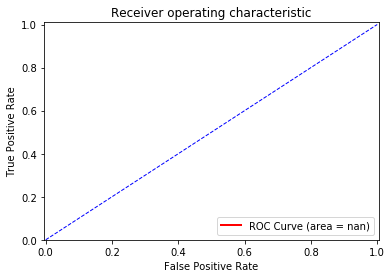

In [19]:
%matplotlib inline

plt.figure()

plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()